In [72]:
import pandas as pd
from pandas import DataFrame

from datetime import datetime

import timeit

import random

import numpy as np
from numpy import array

import matplotlib.pyplot as plt

import scipy as scipy
from scipy import optimize
from scipy.optimize import curve_fit

import seaborn as sns


import folium
from folium.plugins import HeatMap
from folium import plugins


import requests

import os

from Bio.PDB import *

# https://stackoverflow.com/questions/39826250/conda-stuck-on-proceed-y-n-when-updating-packages-in-ipython-console
#!conda config --add channels conda-forge
#!conda install nglview -c bioconda
#!jupyter nbextension enable nglview --py --sys-prefix


import nglview as nv

In [73]:
# https://www.rcsb.org/structure/6M03
pdb1 = PDBList()
pdb1.retrieve_pdb_file('6m03')

import os

parser = MMCIFParser()

structure = parser.get_structure('6m03','/m0/6m03.cif')

def cleandir(obj):
    print(", ".join([a for a in dir(obj) if not a.startswith("_")]))
cleandir(structure)

view = nv.show_biopython(structure)
view.clear_representations()
view.add_cartoon('protein')
view

Structure exists: '/home/fabio/m0/6m03.cif' 
add, child_dict, child_list, copy, detach_child, detach_parent, full_id, get_atoms, get_chains, get_full_id, get_id, get_iterator, get_level, get_list, get_models, get_parent, get_residues, has_id, header, id, insert, level, parent, set_parent, transform, xtra


NGLWidget()

In [74]:
# alteração da formatação github WHO em 28/03/2020

#df_confirmados = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
df_confirmados = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
#df_mortes = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
df_mortes = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
#df_recuperados = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')
df_recuperados = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [75]:
df_confirmados.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
1/23/20             int64
1/24/20             int64
1/25/20             int64
1/26/20             int64
1/27/20             int64
1/28/20             int64
1/29/20             int64
1/30/20             int64
1/31/20             int64
2/1/20              int64
2/2/20              int64
2/3/20              int64
2/4/20              int64
2/5/20              int64
2/6/20              int64
2/7/20              int64
2/8/20              int64
2/9/20              int64
2/10/20             int64
2/11/20             int64
2/12/20             int64
2/13/20             int64
2/14/20             int64
2/15/20             int64
2/16/20             int64
                   ...   
4/9/20              int64
4/10/20             int64
4/11/20             int64
4/12/20             int64
4/13/20             int64
4/14/20             int64
4/15/20             int64
4/16/20     

In [76]:
display(df_confirmados)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,1939,2171,2335,2469,2704,2894,3224,3392,3563,3778
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,766,773,782,789,795,803,820,832,842,850
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,3848,4006,4154,4295,4474,4648,4838,4997,5182,5369
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,743,745,745,747,748,750,751,751,752,752
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,27,27,30,35,35,35,36,36,36,43
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,24,24,25,25,25,25,25,25,25,25
6,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,4285,4428,4532,4681,4783,4887,5020,5208,5371,5611
7,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,1932,2066,2148,2273,2386,2507,2619,2782,2884,3029
8,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,106,106,106,106,106,107,107,107,107,107
9,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,3,4,...,3016,3025,3030,3035,3033,3035,3042,3044,3047,3051


In [77]:
datetime_object = datetime.strptime(df_confirmados.columns[4], '%m/%d/%y')
datetime_object.strftime("%d %B %Y")
display(datetime_object)


# https://www.unfpa.org/data/world-population-dashboard
# população mundial de 7.715 bilhões de habitantes
pop_mundial = 7715000000

casos_confirmados_mundo = df_confirmados.iloc[:,-1].sum()
mortes_mundo = df_mortes.iloc[:,-1].sum()
recuperados = df_recuperados.iloc[:,-1].sum()

# https://stackoverflow.com/questions/5997987/is-there-an-operator-to-calculate-percentage-in-python
def perc(part, whole):
  return "(" + str(100 * float(part)/float(whole)) + "%)"

print("Total de casos confirmados no mundo: ", casos_confirmados_mundo, perc(casos_confirmados_mundo,pop_mundial))
print("Total mortes no mundo: ", mortes_mundo, perc(mortes_mundo,pop_mundial))
print("Total recuperados no mundo: ", recuperados, perc(recuperados,pop_mundial))

datetime.datetime(2020, 1, 22, 0, 0)

Total de casos confirmados no mundo:  3938064 (0.05104425145819832%)
Total mortes no mundo:  274898 (0.0035631626701231366%)
Total recuperados no mundo:  1322050 (0.017136098509397277%)


In [78]:
df_brasil_io = pd.read_csv('https://brasil.io/dataset/covid19/caso/?is_last=True&place_type=city&format=csv')
df_brasil_io.dropna()

,date,state,city,place_type,confirmed,deaths,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-05-08,AC,Acrelândia,city,17,1,True,15256.0,1200013.0,111.43157,0.0588
1,2020-05-08,AC,Assis Brasil,city,1,0,True,7417.0,1200054.0,13.48254,0.0000
2,2020-05-08,AC,Bujari,city,4,0,True,10266.0,1200138.0,38.96357,0.0000
3,2020-05-08,AC,Capixaba,city,1,0,True,11733.0,1200179.0,8.52297,0.0000
4,2020-05-08,AC,Cruzeiro do Sul,city,47,0,True,88376.0,1200203.0,53.18186,0.0000
5,2020-05-08,AC,Epitaciolândia,city,2,0,True,18411.0,1200252.0,10.86307,0.0000
6,2020-05-08,AC,Feijó,city,1,0,True,34780.0,1200302.0,2.87522,0.0000
8,2020-05-08,AC,Mâncio Lima,city,3,0,True,18977.0,1200336.0,15.80861,0.0000
9,2020-05-08,AC,Plácido de Castro,city,62,3,True,19761.0,1200385.0,313.74930,0.0484
10,2020-05-08,AC,Porto Acre,city,8,0,True,18504.0,1200807.0,43.23390,0.0000


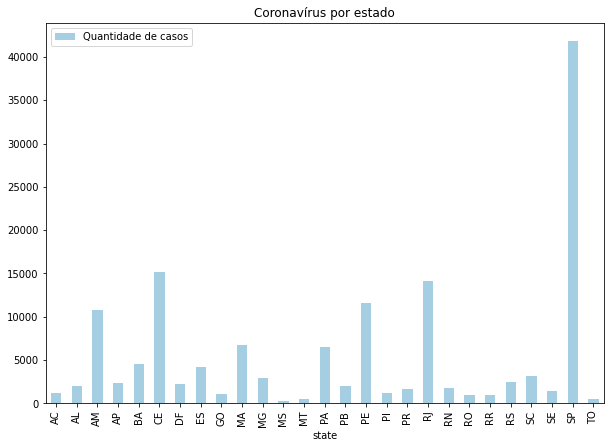

In [79]:
df_brasil_io_estados = df_brasil_io[['state', 'confirmed', 'deaths']].groupby(df_brasil_io['state'])
df_brasil_io_estados_total = df_brasil_io_estados.sum().reset_index()

# https://servicodados.ibge.gov.br/api/docs/malhas?versao=2
malhas_brasil = requests.get('https://servicodados.ibge.gov.br/api/v2/malhas/?resolucao=2&formato=application/vnd.geo+json').json()

# https://servicodados.ibge.gov.br/api/docs/localidades
ids_estados = requests.get('https://servicodados.ibge.gov.br/api/v1/localidades/estados').json()

malha_id = []
estados_id = []
codigos_estados = []
casos_estado = []

for feature in malhas_brasil['features']:
    malha_id.append( str(feature['properties']['codarea']) )
    
for state in ids_estados:
    estados_id.append( str(state['id']) )
    codigos_estados.append(state['sigla'])
    
# troca do nome de sigla para state, para merge com brasil.io
estados = pd.DataFrame( {'id': estados_id, 'state': codigos_estados} )

estados.set_index('id', inplace=True)
estados.sort_values(by=['state'])

for feature in malhas_brasil['features']:
    
    coordenadas = feature['properties']['centroide']
    latitude = coordenadas[1]
    longitude = coordenadas[0]
    
    cod = str(feature['properties']['codarea'])
    
    estados.loc[cod,'lat'] = latitude
    estados.loc[cod,'lng'] = longitude
    
estados.reset_index(inplace=True)

df_estados = pd.merge(left=df_brasil_io_estados_total, right=estados, left_on='state', right_on='state')
#df_estados

df_estados.plot(kind='bar',x='state',y='confirmed', label='Quantidade de casos', figsize=(10, 7), colormap='Paired', title='Coronavírus por estado')
plt.show()

In [80]:
brasil = folium.Map(
    location=[-16.1237611, -59.9219642],
    zoom_start=4
)

pontos = df_estados[['lat', 'lng', 'confirmed']].dropna().values
pontosArrays = np.split(pontos, len(pontos))

confirmados = df_estados['confirmed'].tolist()

confirmados = [np.log(x) for x in confirmados][:27]

for pontos, radius in zip(pontosArrays, confirmados):
    plugins.HeatMap(pontos,radius=radius, gradient={.4: 'red', .65: 'red', 1: 'red'}).add_to(brasil)
    
brasil

/home/fabio/miniconda2/lib/python3.7/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/fabio/miniconda2/lib/python3.7/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/fabio/miniconda2/lib/python3.7/site-packages/pandas/plotting/_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/fabio/miniconda2/lib/python3.7/site-packages/pandas/plotting/_tools.

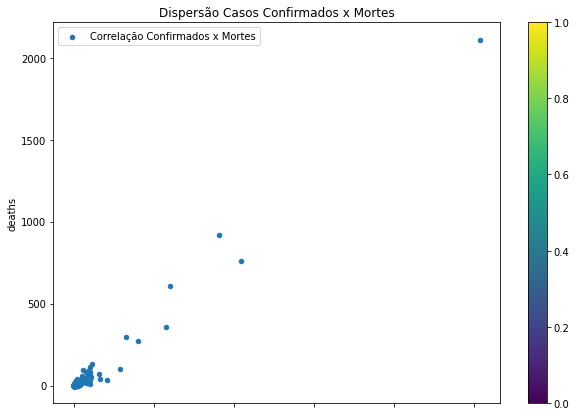

In [81]:
df_brasil_io_estados_populacao = df_brasil_io
df_brasil_io_estados_populacao.plot(kind='scatter',x='confirmed', y='deaths', label='Correlação Confirmados x Mortes', figsize=(10, 7), colormap='Paired', title='Dispersão Casos Confirmados x Mortes')

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1939,2171,2335,2469,2704,2894,3224,3392,3563,3778
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,766,773,782,789,795,803,820,832,842,850
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,3848,4006,4154,4295,4474,4648,4838,4997,5182,5369
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,743,745,745,747,748,750,751,751,752,752
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,27,27,30,35,35,35,36,36,36,43


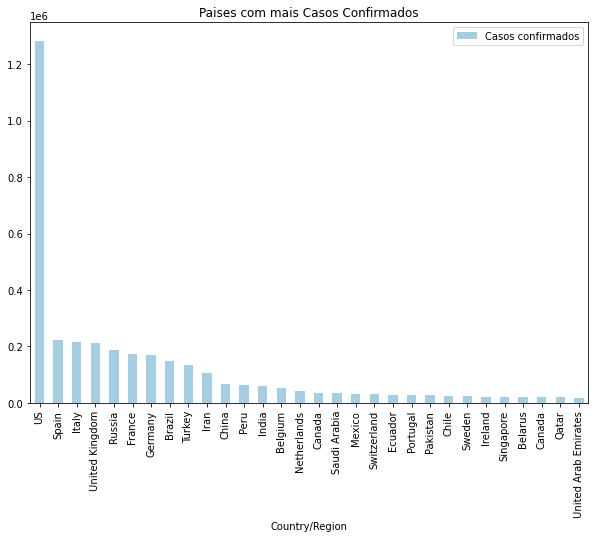

In [82]:
display(df_confirmados.head(5))

df_confirmados_mundo = df_confirmados.sort_values(by = df_confirmados.columns[-1], ascending = False)
colunas = list(df_confirmados_mundo.columns[1:2]) + list(df_confirmados_mundo.columns[-1:])
df_confirmados_mundo = df_confirmados_mundo[colunas]
df_confirmados_mundo.columns.values[-1] = "Casos confirmados"
df_confirmados_mundo.reset_index()
df_confirmados_mundo = df_confirmados_mundo.head(30)
df_confirmados_mundo.plot(kind='bar',x='Country/Region',y='Casos confirmados', figsize=(10, 7), colormap='Paired', title='Paises com mais Casos Confirmados')

In [83]:
df_confirmados_mundo_mapa = df_confirmados.sort_values(by = df_confirmados.columns[-1], ascending = False)
colunas =  list(df_confirmados_mundo_mapa.columns[2:3]) + list(df_confirmados_mundo_mapa.columns[3:4]) + list(df_confirmados_mundo_mapa.columns[-1:])
df_confirmados_mundo_mapa = df_confirmados_mundo_mapa[colunas]
df_confirmados_mundo_mapa.columns.values[-1] = "Casos confirmados"
df_confirmados_mundo_mapa.columns.values[-2] = "Long"
df_confirmados_mundo_mapa.columns.values[-3] = "Lat"
df_confirmados_mundo_mapa.reset_index()


mundo = folium.Map(
    location=[7.340773, -1.060596],    # Coordenadas retiradas do Google Maps
    zoom_start=2
)

    
pontos = df_confirmados_mundo_mapa[['Lat', 'Long', 'Casos confirmados']].dropna().values
pontosArrays = np.split(pontos, len(pontos))

confirmados = df_confirmados_mundo_mapa['Casos confirmados'].tolist()

# foi utilizado o logaritmo, pois EUA esta muito acima no momento
confirmados = [np.log(x) for x in confirmados][:100]

for ponto, radius in zip(pontosArrays, confirmados):
    plugins.HeatMap(ponto,radius=radius, gradient={.4: 'red', .65: 'red', 1: 'red'}).add_to(mundo)
    
mundo


/home/fabio/miniconda2/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,60,64,68,72,85,90,95,104,106,109
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,30,31,31,31,31,31,31,31,31,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,444,450,453,459,463,465,470,476,483,488
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,42,42,43,44,45,45,46,46,47,47
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


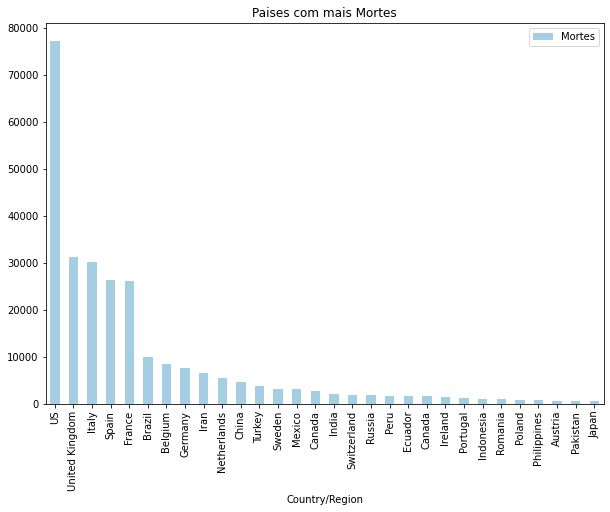

In [84]:
display(df_mortes.head(5))


df_mortes_mundo = df_mortes.sort_values(by = df_mortes.columns[-1], ascending = False)
colunas = list(df_mortes_mundo.columns[1:2]) + list(df_mortes_mundo.columns[-1:])
df_mortes_mundo = df_mortes_mundo[colunas]
df_mortes_mundo.columns.values[-1] = "Mortes"
df_mortes_mundo.reset_index()
df_mortes_mundo = df_mortes_mundo.head(30)
df_mortes_mundo.plot(kind='bar',x='Country/Region',y='Mortes', figsize=(10, 7), colormap='Paired', title='Paises com mais Mortes')

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,252,260,310,331,345,397,421,458,468,472
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,455,470,488,519,531,543,570,595,605,620
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1702,1779,1821,1872,1936,1998,2067,2197,2323,2467
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,423,468,468,472,493,499,514,521,526,537
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,7,7,11,11,11,11,11,11,11,11


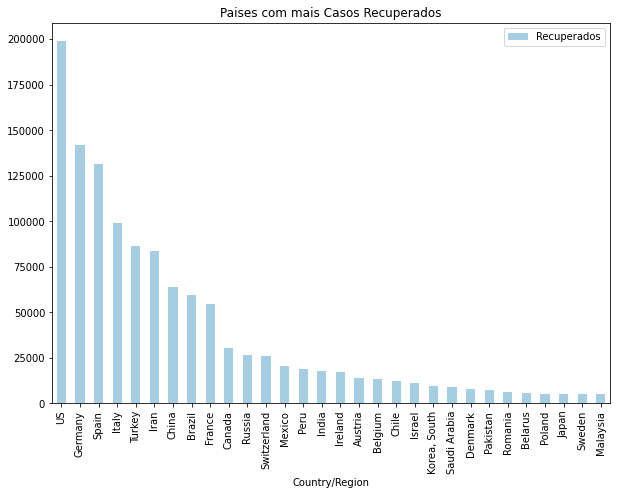

In [85]:
display(df_recuperados.head(5))

df_recuperados_mundo = df_recuperados.sort_values(by = df_recuperados.columns[-1], ascending = False)
colunas = list(df_recuperados_mundo.columns[1:2]) + list(df_recuperados_mundo.columns[-1:])
df_recuperados_mundo = df_recuperados_mundo[colunas]
df_recuperados_mundo.columns.values[-1] = "Recuperados"
df_recuperados_mundo.reset_index()
df_recuperados_mundo = df_recuperados_mundo.head(30)
df_recuperados_mundo.plot(kind='bar',x='Country/Region',y='Recuperados', figsize=(10, 7), colormap='Paired', title='Paises com mais Casos Recuperados')

In [86]:
df_confirmados_total = df_confirmados.groupby(["Country/Region"]).sum().drop(['Lat','Long'],axis =1).iloc[:,-1]
df_mortes_total = df_mortes.groupby(["Country/Region"]).sum().drop(['Lat','Long'],axis =1).iloc[:,-1]
df_recuperados_total = df_recuperados.groupby(["Country/Region"]).sum().drop(['Lat','Long'],axis =1).iloc[:,-1]

In [87]:
#print(df_confirmados_total)
#print(df_mortes_total)
#print(df_recuperados_total)

In [88]:
def obter_info_pais(pais, df_confirmados, df_mortes, df_recuperados):
    
    #for pais in pais:
    casos_confirmados = df_confirmados.set_index('Country/Region')
    casos_confirmados_grafico = casos_confirmados.loc[pais].drop(['Province/State','Lat','Long'])
    casos_confirmados_total = casos_confirmados_grafico[-1]
    #print(casos_confirmados_grafico[:-1][-1])
    #print(len(casos_confirmados_grafico))
    
    casos_mortes = df_mortes.set_index('Country/Region')
    casos_mortes_grafico = casos_mortes.loc[pais].drop(['Province/State','Lat','Long'])
    casos_mortes_total = casos_mortes_grafico[-1]

    
    casos_recuperados = df_recuperados.set_index('Country/Region')
    casos_recuperados_grafico = casos_recuperados.loc[pais].drop(['Province/State','Lat','Long'])
    casos_recuperados_total = casos_recuperados_grafico[-1]

    letalidade_pais_atual = (casos_mortes_total * 100) / casos_confirmados_total

    
    dias = len(casos_confirmados_grafico)
    letalidade_pais_grafico = []
    i = 0
    while i < dias:
        i = i + 1
        letalidade_pais_dia = (casos_mortes_grafico[:i][-1] * 100) / casos_confirmados_grafico[:i][-1]
        #print(casos_confirmados_grafico[:i][-1])
        letalidade_pais_grafico.append(letalidade_pais_dia)  

        
    #print(letalidade_pais_grafico)
    return casos_confirmados_grafico, casos_confirmados_total, casos_mortes_grafico, casos_mortes_total, casos_recuperados_grafico, casos_recuperados_total, letalidade_pais_atual, letalidade_pais_grafico;


In [89]:
casos_confirmados_grafico, casos_confirmados_total, casos_mortes_grafico, casos_mortes_total, casos_recuperados_grafico, casos_recuperados_total, letalidade_pais_atual, letalidade_pais_grafico = obter_info_pais('Brazil', df_confirmados, df_mortes, df_recuperados)

/home/fabio/miniconda2/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in long_scalars


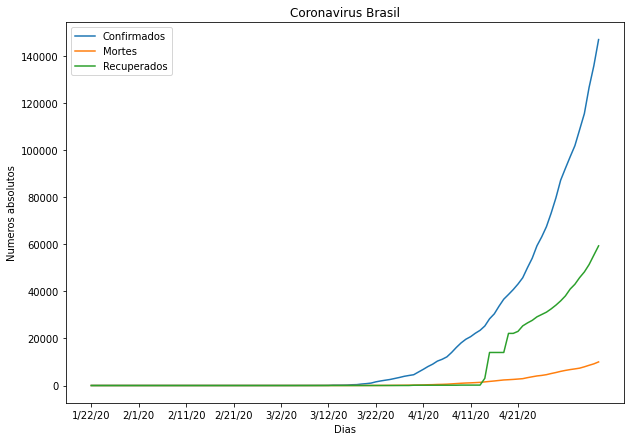

In [90]:
# Dados já recuperados para o Brasil:
# casos_confirmados_grafico
# casos_confirmados_total
# casos_mortes_grafico
# casos_mortes_total
# casos_recuperados_grafico
# casos_recuperados_total
# letalidade_pais_atual
# letalidade_pais_grafico


plt.figure(figsize= (10,7))
plt.title('Coronavirus Brasil')
plt.xlabel('Dias')
#plt.xticks(range(0, 100, 10), fontsize=10, rotation=20)  
plt.xticks(range(0, 100, 10), fontsize=10)  
plt.ylabel('Numeros absolutos')

plt.plot(casos_confirmados_grafico, label = 'Confirmados')
plt.plot(casos_mortes_grafico, label = 'Mortes')
plt.plot(casos_recuperados_grafico, label = 'Recuperados')

#display(casos_confirmados_grafico)


plt.legend()

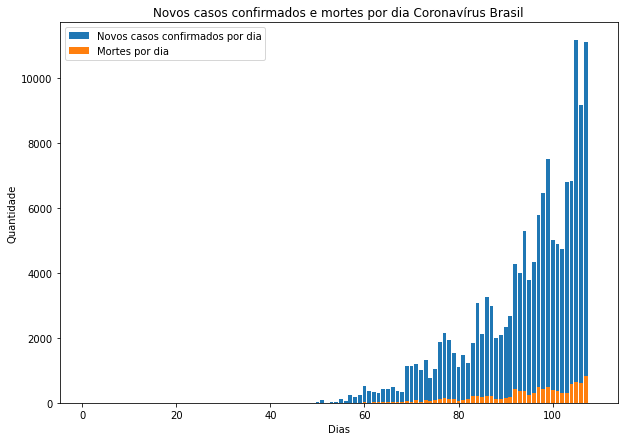

In [91]:
# Dados já recuperados para o Brasil:
# casos_confirmados_grafico
# casos_confirmados_total
# casos_mortes_grafico
# casos_mortes_total
# casos_recuperados_grafico
# casos_recuperados_total
# letalidade_pais_atual
# letalidade_pais_grafico

plt.figure(figsize= (10,7))

dias = []
casos_diarios = []
mortes_diarios = []
recuperados_diarios = []

i = 0
while i < len(casos_confirmados_grafico):
    i = i + 1
    casos_diarios.append(casos_confirmados_grafico[:i+1][-1] - casos_confirmados_grafico[:i][-1])
    mortes_diarios.append(casos_mortes_grafico[:i+1][-1] - casos_mortes_grafico[:i][-1])
    recuperados_diarios.append(casos_recuperados_grafico[:i+1][-1] - casos_recuperados_grafico[:i][-1])
    dias.append(i)


plt.title('Novos casos confirmados e mortes por dia Coronavírus Brasil')
plt.xlabel('Dias')
plt.ylabel('Quantidade')
#plt.yscale('log')

plt.bar(dias,casos_diarios, label = 'Novos casos confirmados por dia')
plt.bar(dias,mortes_diarios, label = 'Mortes por dia')

plt.legend()

/home/fabio/miniconda2/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in long_scalars


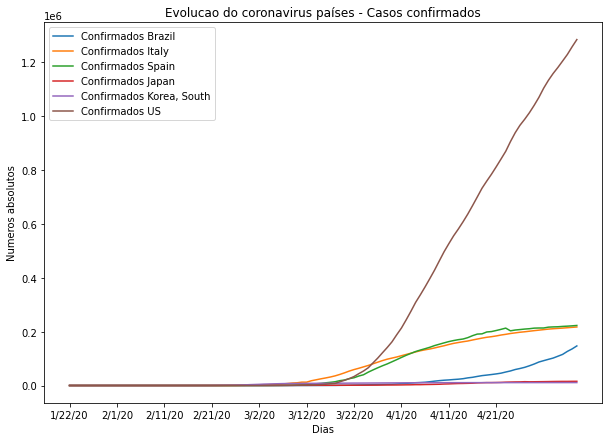

In [92]:
plt.figure(figsize= (10,7))
plt.title('Evolucao do coronavirus países - Casos confirmados')
plt.xlabel('Dias')
plt.xticks(range(0, 100, 10), fontsize=10)  
plt.ylabel('Numeros absolutos')

paises = ['Brazil', 'Italy', 'Spain', 'Japan', 'Korea, South', 'US']

for pais in paises:
    casos_confirmados_grafico, casos_confirmados_total, casos_mortes_grafico, casos_mortes_total, casos_recuperados_grafico, casos_recuperados_total, letalidade_pais_atual, letalidade_pais_grafico = obter_info_pais(pais, df_confirmados, df_mortes, df_recuperados)
    plt.plot(casos_confirmados_grafico, label = 'Confirmados ' + pais)
    
plt.legend()

/home/fabio/miniconda2/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in long_scalars


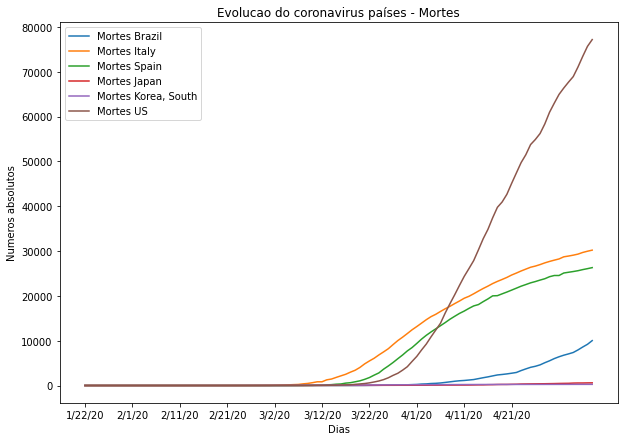

In [93]:
plt.figure(figsize= (10,7))
plt.title('Evolucao do coronavirus países - Mortes')
plt.xlabel('Dias')
plt.xticks(range(0, 100, 10), fontsize=10)  
plt.ylabel('Numeros absolutos')

paises = ['Brazil', 'Italy', 'Spain', 'Japan', 'Korea, South', 'US']

for pais in paises:
    casos_confirmados_grafico, casos_confirmados_total, casos_mortes_grafico, casos_mortes_total, casos_recuperados_grafico, casos_recuperados_total, letalidade_pais_atual, letalidade_pais_grafico = obter_info_pais(pais, df_confirmados, df_mortes, df_recuperados)
    plt.plot(casos_mortes_grafico, label = 'Mortes ' + pais)
    
plt.legend()

/home/fabio/miniconda2/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in long_scalars


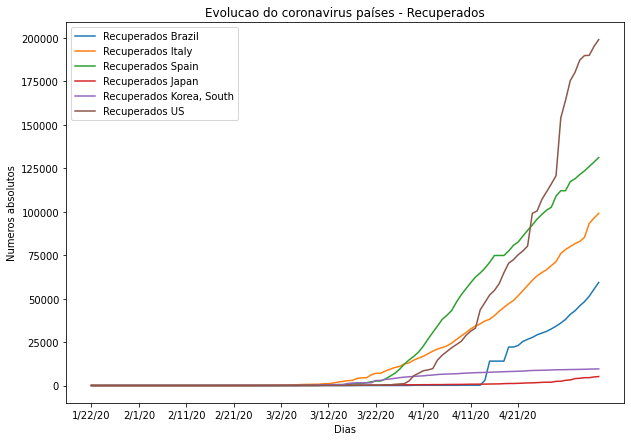

In [94]:
plt.figure(figsize= (10,7))
plt.title('Evolucao do coronavirus países - Recuperados')
plt.xlabel('Dias')
plt.xticks(range(0, 100, 10), fontsize=10)  
plt.ylabel('Numeros absolutos')

paises = ['Brazil', 'Italy', 'Spain', 'Japan', 'Korea, South', 'US']

for pais in paises:
    casos_confirmados_grafico, casos_confirmados_total, casos_mortes_grafico, casos_mortes_total, casos_recuperados_grafico, casos_recuperados_total, letalidade_pais_atual, letalidade_pais_grafico = obter_info_pais(pais, df_confirmados, df_mortes, df_recuperados)
    plt.plot(casos_recuperados_grafico, label = 'Recuperados ' + pais)

    
plt.legend()

In [95]:
casos_confirmados_grafico, casos_confirmados_total, casos_mortes_grafico, casos_mortes_total, casos_recuperados_grafico, casos_recuperados_total, letalidade_pais_atual, letalidade_pais_grafico = obter_info_pais('Brazil', df_confirmados, df_mortes, df_recuperados)

/home/fabio/miniconda2/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in long_scalars


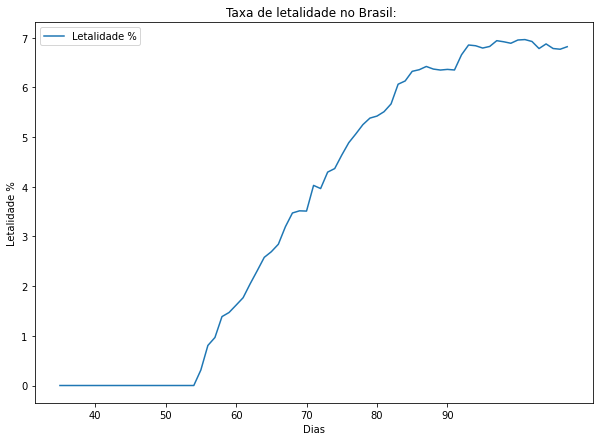

In [96]:
# Dados já recuperados para o Brasil:
# casos_confirmados_grafico
# casos_confirmados_total
# casos_mortes_grafico
# casos_mortes_total
# casos_recuperados_grafico
# casos_recuperados_total
# letalidade_pais_atual
# letalidade_pais_grafico


plt.figure(figsize= (10,7))
plt.title('Taxa de letalidade no Brasil: ')
plt.xlabel('Dias')
plt.xticks(range(0, 100, 10), fontsize=10)  
plt.ylabel('Letalidade %')

plt.plot(letalidade_pais_grafico, label = 'Letalidade %')
plt.legend()


/home/fabio/miniconda2/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in long_scalars


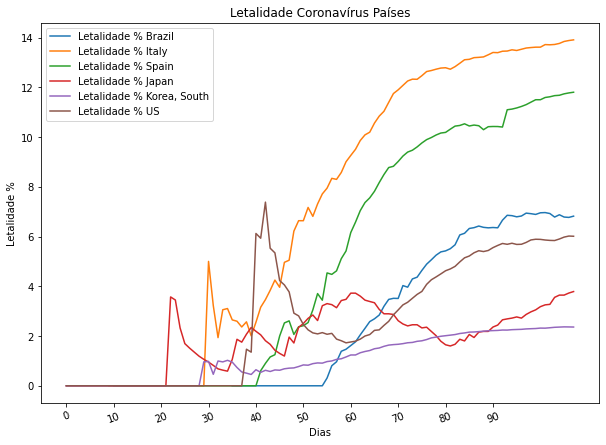

In [97]:
plt.figure(figsize= (10,7))
plt.title('Letalidade Coronavírus Países')
plt.xlabel('Dias')
plt.xticks(range(0, 100, 10), fontsize=10, rotation=20)  
plt.ylabel('Letalidade %')

paises = ['Brazil', 'Italy', 'Spain', 'Japan', 'Korea, South', 'US']

for pais in paises:
    casos_confirmados_grafico, casos_confirmados_total, casos_mortes_grafico, casos_mortes_total, casos_recuperados_grafico, casos_recuperados_total, letalidade_pais_atual, letalidade_pais_grafico = obter_info_pais(pais, df_confirmados, df_mortes, df_recuperados)
    plt.plot(letalidade_pais_grafico, label = 'Letalidade % ' + pais)

    
plt.legend()

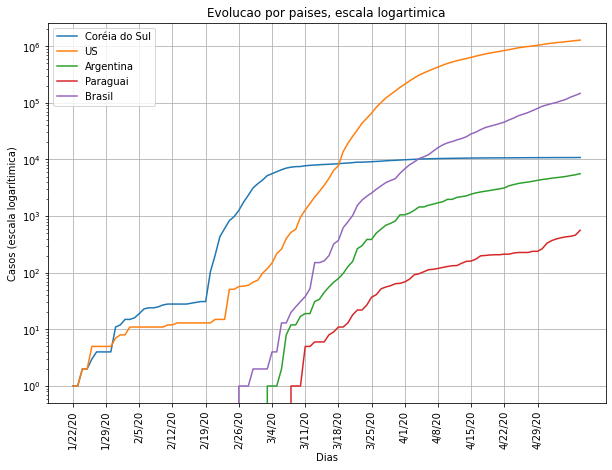

In [98]:
df_confirmados_brasil = df_confirmados.set_index('Country/Region')
df_confirmados_brasil_total = df_confirmados_brasil.loc["Brazil"].drop(['Province/State','Lat','Long'])


df_confirmados_coreiadosul = df_confirmados.set_index('Country/Region')
df_confirmados_coreiadosul_total = df_confirmados_coreiadosul.loc["Korea, South"].drop(['Province/State','Lat','Long'])

df_confirmados_us = df_confirmados.set_index('Country/Region')
df_confirmados_us_total = df_confirmados_us.loc["US"].drop(['Province/State','Lat','Long'])

df_confirmados_argentina = df_confirmados.set_index('Country/Region')
df_confirmados_argentina_total = df_confirmados_argentina.loc["Argentina"].drop(['Province/State','Lat','Long'])

df_confirmados_paraguai = df_confirmados.set_index('Country/Region')
df_confirmados_paraguai_total = df_confirmados_paraguai.loc["Paraguay"].drop(['Province/State','Lat','Long'])

plt.figure(figsize= (10,7))
plt.title('Evolucao por paises, escala logartimica')
plt.xlabel('Dias')
plt.xticks(range(0, 100, 7), fontsize=10, rotation=90)  
plt.ylabel('Casos (escala logarítimica)')
plt.yscale('log')

plt.plot(df_confirmados_coreiadosul_total, label = 'Coréia do Sul')
plt.plot(df_confirmados_us_total, label = 'US')
plt.plot(df_confirmados_argentina_total, label = 'Argentina')
plt.plot(df_confirmados_paraguai_total, label = 'Paraguai')
plt.plot(df_confirmados_brasil_total, label = 'Brasil')

plt.grid(True)
plt.legend()

In [99]:
casos_confirmados_grafico, casos_confirmados_total, casos_mortes_grafico, casos_mortes_total, casos_recuperados_grafico, casos_recuperados_total, letalidade_pais_atual, letalidade_pais_grafico = obter_info_pais('Brazil', df_confirmados, df_mortes, df_recuperados)

/home/fabio/miniconda2/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in long_scalars


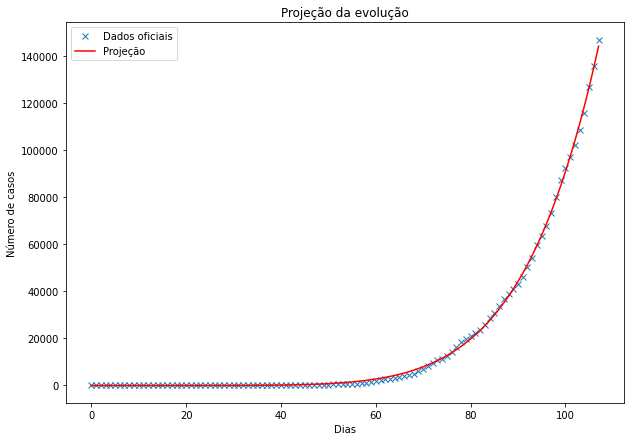

Função ajustada de acordo com os dados obtidos para o Brasil: 
Total de casos confirmados =  1.960606688021608e-09  * (dia) ^  6.833209361457803  +  -328.2666532366743


In [100]:
# Dados já recuperados para o Brasil:
# casos_confirmados_grafico
# casos_confirmados_total
# casos_mortes_grafico
# casos_mortes_total
# casos_recuperados_grafico
# casos_recuperados_total
# letalidade_pais_atual
# letalidade_pais_grafico


# novas ocorrências por dia
df_confirmados_brasil = df_confirmados.set_index('Country/Region')
df_confirmados_brasil_total = df_confirmados_brasil.loc["Brazil"].drop(['Province/State','Lat','Long'])
df_confirmados_brasil_total_x = df_confirmados_brasil_total.values.tolist()
# descomentar a linha abaixo para desconsiderar dias iniciais sem ocorrências (left tail)
# df_confirmados_brasil_total_x = list(filter(lambda num: num != 0, df_confirmados_brasil_total_x))
df_confirmados_brasil_total_x = array(df_confirmados_brasil_total_x)
df_confirmados_brasil_total_x.reshape(-1,1)


# número total de observações (em dias)
df_confirmados_brasil_total_y = list(range(len(df_confirmados_brasil_total_x)))
df_confirmados_brasil_total_y = array(df_confirmados_brasil_total_y)
df_confirmados_brasil_total_y.reshape(-1,1)


# https://stackoverflow.com/questions/10857948/use-of-curve-fit-to-fit-data
def func(x, a, b, c):
    return a*x**b + c


p0 = np.array([1,1,1])
coeffs, matcov = curve_fit(func, df_confirmados_brasil_total_y, df_confirmados_brasil_total_x, p0, maxfev=5000)

yaj = func(df_confirmados_brasil_total_y, coeffs[0], coeffs[1], coeffs[2])


plt.figure(figsize= (10,7))
plt.plot(df_confirmados_brasil_total_x, 'x', label='Dados oficiais')
plt.plot(yaj, 'r-', label='Projeção')


plt.title('Projeção da evolução')
plt.xlabel('Dias')
plt.ylabel('Número de casos')


plt.legend()
plt.show()


print("Função ajustada de acordo com os dados obtidos para o Brasil: ")
print("Total de casos confirmados = ", coeffs[0], " * (dia) ^ ", coeffs[1], " + ", coeffs[2])

# exemplo de calculo para o dia 32:
#print(func(32, coeffs[0], coeffs[1], coeffs[2]))

,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,...,2020-04-29 00:00:00,2020-04-30 00:00:00,2020-05-01 00:00:00,2020-05-02 00:00:00,2020-05-03 00:00:00,2020-05-04 00:00:00,2020-05-05 00:00:00,2020-05-06 00:00:00,2020-05-07 00:00:00,2020-05-08 00:00:00
Projetados,0,0,0,0,0,0,0,0,0,0,...,79685,87187,92202,97100,101826,108620,115455,126611,135773,146894


,2020-09-05 00:00:00,2020-09-06 00:00:00,2020-09-07 00:00:00,2020-09-08 00:00:00,2020-09-09 00:00:00,2020-09-10 00:00:00,2020-09-11 00:00:00,2020-09-12 00:00:00,2020-09-13 00:00:00,2020-09-14 00:00:00
Projeção 10 dias,153558,163562,174115,185243,196971,209327,222337,236030,250435,265583


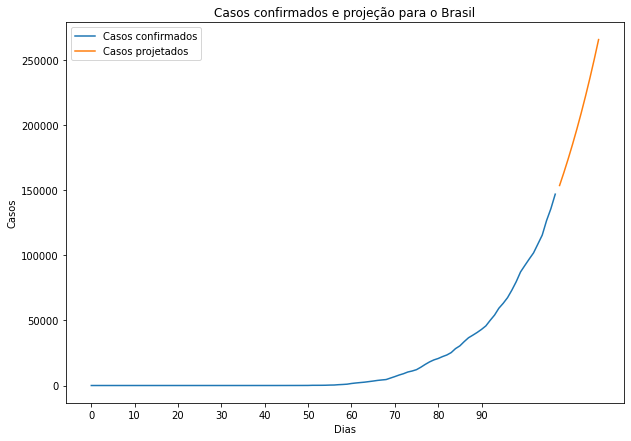

In [101]:
# quantidade de casos estimados por dia
# display(df_confirmados_brasil_total_x)
# novos_casos_por_dia = func(dia, coeffs[0], coeffs[1], coeffs[2])

# 10 dias a partir do ultimo dia analisado
# display(len(df_confirmados_brasil_total_y))
dias_subsequentes = [len(df_confirmados_brasil_total_y) + x for x in range(10)]

# funcao que calcula novos casos para dia
# argumentos: dias_a_projetar, funcao_projecao, parametros a, b, c encontrados utilizando dados anteriores
def projecao(dias_a_projetar, funcao_projecao, a, b, c):
    casos_estimados_por_dia = []
    for i in dias_a_projetar:
        casos_estimados_por_dia.append(funcao_projecao(i, a, b, c))        
    return casos_estimados_por_dia


fig = plt.figure(figsize= (10,7))

projetados = projecao(dias_subsequentes, func, coeffs[0], coeffs[1], coeffs[2])

projetados_df = []
projetados_tabela = [ '%.0f' % elem for elem in df_confirmados_brasil_total_x ]
projetados_df.append(projetados_tabela)

tabela_projetados = pd.DataFrame(projetados_df)
tabela_projetados.index = ["Projetados"]
datelist = pd.date_range(datetime_object.strftime('%d/%m/%Y'), periods=len(projetados_tabela)).tolist()
tabela_projetados.columns = datelist
display(tabela_projetados)

cmd = sns.light_palette('green', as_cmap=True)

s = tabela_projetados.style.background_gradient(cmap=cmd, low=0, high=1, axis=0)
s

projecao_df = []
projecao_tabela = [ '%.0f' % elem for elem in projetados ]
projecao_df.append(projecao_tabela)

tabela_projecao = pd.DataFrame(projecao_df)
tabela_projecao.index = ["Projeção 10 dias"]
datelist = pd.date_range(datetime.today().strftime('%d/%m/%Y'), periods=10).tolist()
tabela_projecao.columns = datelist
display(tabela_projecao)

cmd = sns.light_palette('green', as_cmap=True)

s = tabela_projecao.style.background_gradient(cmap=cmd, low=0, high=1, axis=0)
s


plt.title('Casos confirmados e projeção para o Brasil')
plt.xlabel('Dias')
plt.xticks(range(0, 100, 10), fontsize=10)  
plt.ylabel('Casos')

plt.plot(df_confirmados_brasil_total_x, label = 'Casos confirmados')
plt.plot(dias_subsequentes, projetados, label = 'Casos projetados')
plt.legend()

In [102]:
def obter_projecao_pais(pais, df_confirmados, df_mortes, df_recuperados):


    # novas ocorrências por dia
    df_confirmados_pais = df_confirmados.set_index('Country/Region')
    df_confirmados_pais_total = df_confirmados_pais.loc[pais].drop(['Province/State','Lat','Long'])
    df_confirmados_pais_total_x = df_confirmados_pais_total.values.tolist()
    # descomentar a linha abaixo para desconsiderar dias iniciais sem ocorrências (left tail)
    #df_confirmados_pais_total_x = list(filter(lambda num: num != 0, df_confirmados_pais_total_x))
    df_confirmados_pais_total_x = array(df_confirmados_pais_total_x)
    df_confirmados_pais_total_x.reshape(-1,1)
    
    # mortes
    df_mortes_pais = df_mortes.set_index('Country/Region')
    df_mortes_pais_total = df_mortes_pais.loc[pais].drop(['Province/State','Lat','Long'])
    df_mortes_pais_total_x = df_mortes_pais_total.values.tolist()
    # descomentar a linha abaixo para desconsiderar dias iniciais sem ocorrências (left tail)
    #df_mortes_pais_total_x = list(filter(lambda num: num != 0, df_mortes_pais_total_x))
    df_mortes_pais_total_x = array(df_mortes_pais_total_x)
    df_mortes_pais_total_x.reshape(-1,1)
    
    


    # número total de observações (em dias)
    df_confirmados_pais_total_y = list(range(len(df_confirmados_pais_total_x)))
    df_confirmados_pais_total_y = array(df_confirmados_pais_total_y)
    df_confirmados_pais_total_y.reshape(-1,1)

    
    # número total de observações (em dias)
    df_mortes_pais_total_y = list(range(len(df_mortes_pais_total_x)))
    df_mortes_pais_total_y = array(df_mortes_pais_total_y)
    df_mortes_pais_total_y.reshape(-1,1)
    
    
    # https://stackoverflow.com/questions/10857948/use-of-curve-fit-to-fit-data
    def func(x, a, b, c):
        return a*x**b + c
    
    #def func(x, a, b, c):
    #    result = a*(1-np.exp(-b*x**c))
    #    return result    
    
    p0 = np.array([1,1,1])
    
    # confirmados
    coeffs, matcov = curve_fit(func, df_confirmados_pais_total_y, df_confirmados_pais_total_x, p0, maxfev=5000)
    yaj = func(df_confirmados_pais_total_y, coeffs[0], coeffs[1], coeffs[2])

    # confirmados
    coeffs_mortes, matcov_mortes = curve_fit(func, df_mortes_pais_total_y, df_mortes_pais_total_x, p0, maxfev=5000)
    yaj_mortes = func(df_mortes_pais_total_y, coeffs_mortes[0], coeffs_mortes[1], coeffs_mortes[2])

    
    # 10 dias a partir do ultimo dia analisado
    # display(len(df_confirmados_brasil_total_y))
    dias_subsequentes = [len(df_confirmados_pais_total_y) + x for x in range(10)]

    def projecao(dias_a_projetar, funcao_projecao, a, b, c):
        casos_estimados_por_dia = []
        for i in dias_a_projetar:
            casos_estimados_por_dia.append(funcao_projecao(i, a, b, c))        
        return casos_estimados_por_dia
    
    projetados_confirmados = projecao(dias_subsequentes, func, coeffs[0], coeffs[1], coeffs[2])
    projetados_mortes = projecao(dias_subsequentes, func, coeffs_mortes[0], coeffs_mortes[1], coeffs_mortes[2])

    
    
    # retorno:
    return df_confirmados_pais_total_x, yaj, coeffs[0], coeffs[1], coeffs[2], projetados_confirmados, df_mortes_pais_total_x, yaj_mortes, coeffs_mortes[0], coeffs_mortes[1], coeffs_mortes[2], projetados_mortes, dias_subsequentes



Função casos confirmados =  1.960606688021608e-09  * (dia) ^  6.833209361457803  +  -328.2666532366743
Função mortes            =  2.133606418683804e-11  * (dia) ^  7.230775985475616  +  -47.808085659042


,2020-09-05 00:00:00,2020-09-06 00:00:00,2020-09-07 00:00:00,2020-09-08 00:00:00,2020-09-09 00:00:00,2020-09-10 00:00:00,2020-09-11 00:00:00,2020-09-12 00:00:00,2020-09-13 00:00:00,2020-09-14 00:00:00
Confirmados,153558,163562,174115,185243,196971,209327,222337,236030,250435,265583
Mortes,10725,11468,12254,13086,13966,14896,15879,16917,18013,19170


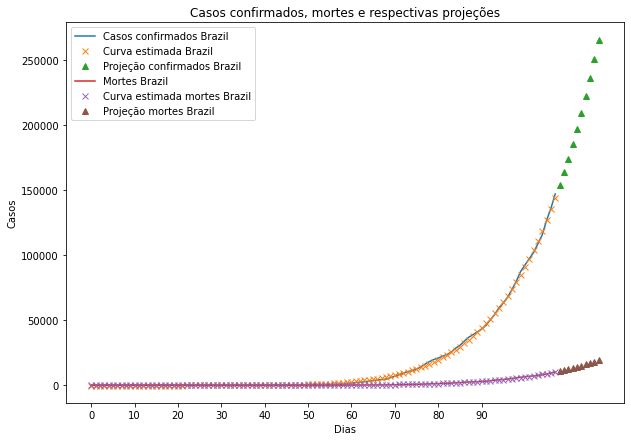

In [103]:
#curva_confirmados, curva_confirmados_calculada, a, b, c, curva_confirmados_projetados, curva_mortes, curva_mortes_calculada, d, e, f, curva_mortes_projetados, dias_projetados = obter_projecao_pais('Italy', df_confirmados, df_mortes, df_recuperados)

fig = plt.figure(figsize= (10,7))

plt.title('Casos confirmados, mortes e respectivas projeções')
plt.xlabel('Dias')
plt.xticks(range(0, 100, 10), fontsize=10)  
plt.ylabel('Casos')


paises = ['Brazil']

for pais in paises:
    curva_confirmados, curva_confirmados_calculada, a, b, c, curva_confirmados_projetados, curva_mortes, curva_mortes_calculada, d, e, f, curva_mortes_projetados, dias_projetados = obter_projecao_pais(pais, df_confirmados, df_mortes, df_recuperados)

    plt.plot(curva_confirmados, '-', label='Casos confirmados ' + pais)
    plt.plot(curva_confirmados_calculada, 'x', label='Curva estimada ' + pais)
    plt.plot(dias_projetados, curva_confirmados_projetados, '^', label = 'Projeção confirmados ' + pais)

    plt.plot(curva_mortes, '-', label='Mortes ' + pais)
    plt.plot(curva_mortes_calculada, 'x', label='Curva estimada mortes ' + pais)
    plt.plot(dias_projetados, curva_mortes_projetados, '^', label = 'Projeção mortes ' + pais)

    print("Função casos confirmados = ", a, " * (dia) ^ ", b, " + ", c)
    print("Função mortes            = ", d, " * (dia) ^ ", e, " + ", f)
    
plt.legend()
    
    
#display(curva_mortes_projetados)    
a = []
curva_confirmados_projetados = [ '%.0f' % elem for elem in curva_confirmados_projetados ]
curva_mortes_projetados = [ '%.0f' % elem for elem in curva_mortes_projetados ]
a.append(curva_confirmados_projetados)
a.append(curva_mortes_projetados)

df = pd.DataFrame(a)

df.index = ["Confirmados", "Mortes"]
datelist = pd.date_range(datetime.today().strftime('%d/%m/%Y'), periods=10).tolist()
df.columns = datelist



cm = sns.light_palette('green', as_cmap=True)

s = df.style.background_gradient(cmap=cm, low=0, high=1, axis=0)
s

In [104]:
casos_confirmados_grafico, casos_confirmados_total, casos_mortes_grafico, casos_mortes_total, casos_recuperados_grafico, casos_recuperados_total, letalidade_pais_atual, letalidade_pais_grafico = obter_info_pais('Germany', df_confirmados, df_mortes, df_recuperados)

/home/fabio/miniconda2/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in long_scalars


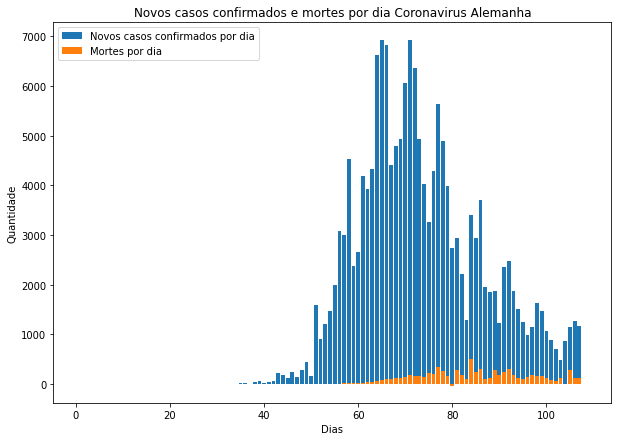

In [105]:
# Dados já recuperados para a Alemanha:
# casos_confirmados_grafico
# casos_confirmados_total
# casos_mortes_grafico
# casos_mortes_total
# casos_recuperados_grafico
# casos_recuperados_total
# letalidade_pais_atual
# letalidade_pais_grafico


plt.figure(figsize= (10,7))


dias = []
casos_diarios = []
mortes_diarios = []
recuperados_diarios = []

i = 0
while i < len(casos_confirmados_grafico):
    i = i + 1
    casos_diarios.append(casos_confirmados_grafico[:i+1][-1] - casos_confirmados_grafico[:i][-1])
    mortes_diarios.append(casos_mortes_grafico[:i+1][-1] - casos_mortes_grafico[:i][-1])
    recuperados_diarios.append(casos_recuperados_grafico[:i+1][-1] - casos_recuperados_grafico[:i][-1])
    dias.append(i)


plt.title('Novos casos confirmados e mortes por dia Coronavirus Alemanha')
plt.xlabel('Dias')
plt.ylabel('Quantidade')

plt.bar(dias,casos_diarios, label = 'Novos casos confirmados por dia')
plt.bar(dias,mortes_diarios, label = 'Mortes por dia')

plt.legend()

/home/fabio/miniconda2/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in power


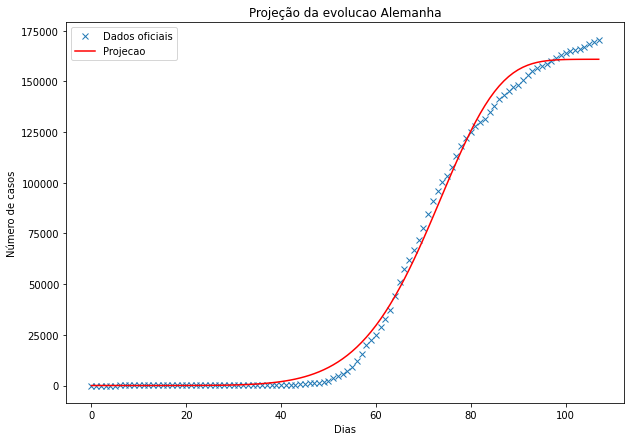

Funcao ajustada de acordo com os dados obtidos para a Alemanha: 
Total de casos confirmados =  160872.0334964495  - e * ( -  8.068268695968665e-14  * dia) ^  6.974192641130747


In [106]:
# Dados já recuperados para a Alemanha:
# casos_confirmados_grafico
# casos_confirmados_total
# casos_mortes_grafico
# casos_mortes_total
# casos_recuperados_grafico
# casos_recuperados_total
# letalidade_pais_atual
# letalidade_pais_grafico


# novas ocorrências por dia
df_confirmados_alemanha = df_confirmados.set_index('Country/Region')
df_confirmados_alemanha_total = df_confirmados_alemanha.loc["Germany"].drop(['Province/State','Lat','Long'])
df_confirmados_alemanha_total_x = df_confirmados_alemanha_total.values.tolist()
# descomentar a linha abaixo de forma a desconsiderar dias inicias sem ocorrências
#df_confirmados_alemanha_total_x = list(filter(lambda num: num != 0, df_confirmados_alemanha_total_x))
df_confirmados_alemanha_total_x = array(df_confirmados_alemanha_total_x)
df_confirmados_alemanha_total_x.reshape(-1,1)


# número total de observações (em dias)
df_confirmados_alemanha_total_y = list(range(len(df_confirmados_alemanha_total_x)))
df_confirmados_alemanha_total_y = array(df_confirmados_alemanha_total_y)
df_confirmados_alemanha_total_y.reshape(-1,1)


# https://www.youtube.com/watch?v=Ewp5CF5ba_w
def func(x, a, b, c):
    result = a*(1-np.exp(-b*x**c))
    return result

p0 = np.array([1,1,1])
coeffs, matcov = curve_fit(func, df_confirmados_alemanha_total_y, df_confirmados_alemanha_total_x, p0, maxfev=5000)

yaj = func(df_confirmados_alemanha_total_y, coeffs[0], coeffs[1], coeffs[2])


plt.figure(figsize= (10,7))
plt.plot(df_confirmados_alemanha_total_x, 'x', label='Dados oficiais')
plt.plot(yaj, 'r-', label='Projecao')



plt.title('Projeção da evolucao Alemanha')
plt.xlabel('Dias')
#plt.xticks(range(0, 100, 10), fontsize=10, rotation=20)  
plt.ylabel('Número de casos')


plt.legend()
plt.show()


print("Funcao ajustada de acordo com os dados obtidos para a Alemanha: ")
print("Total de casos confirmados = ", coeffs[0], " - e * ( - ", coeffs[1], " * dia) ^ ", coeffs[2])



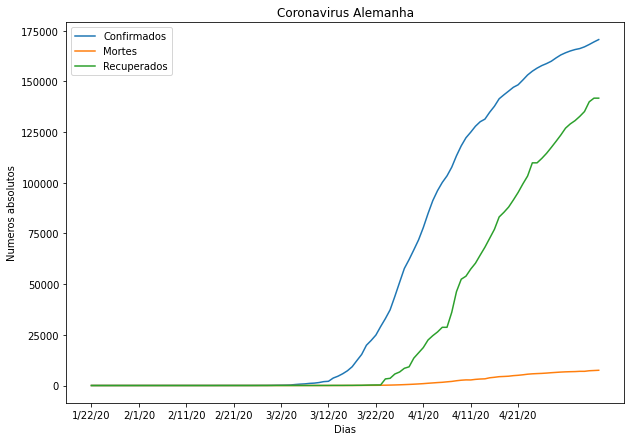

In [107]:
# Dados já recuperados para o Brasil:
# casos_confirmados_grafico
# casos_confirmados_total
# casos_mortes_grafico
# casos_mortes_total
# casos_recuperados_grafico
# casos_recuperados_total
# letalidade_pais_atual
# letalidade_pais_grafico


plt.figure(figsize= (10,7))
plt.title('Coronavirus Alemanha')
plt.xlabel('Dias')
#plt.xticks(range(0, 100, 10), fontsize=10, rotation=20)  
plt.xticks(range(0, 100, 10), fontsize=10)  
plt.ylabel('Numeros absolutos')

plt.plot(casos_confirmados_grafico, label = 'Confirmados')
plt.plot(casos_mortes_grafico, label = 'Mortes')
plt.plot(casos_recuperados_grafico, label = 'Recuperados')

#display(casos_confirmados_grafico)


plt.legend()

/home/fabio/miniconda2/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in long_scalars


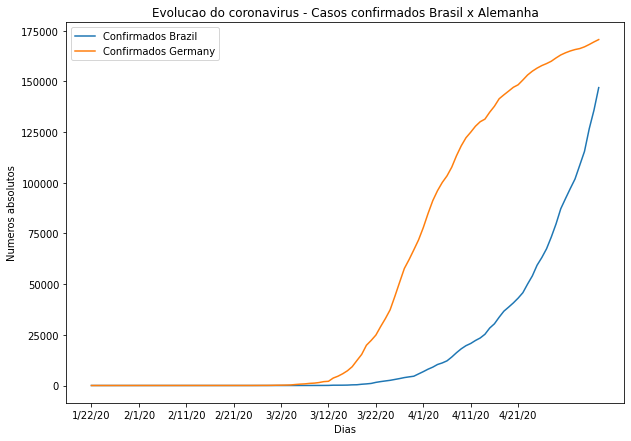

In [108]:
plt.figure(figsize= (10,7))
plt.title('Evolucao do coronavirus - Casos confirmados Brasil x Alemanha')
plt.xlabel('Dias')
plt.xticks(range(0, 100, 10), fontsize=10)  
plt.ylabel('Numeros absolutos')

paises = ['Brazil', 'Germany']

for pais in paises:
    casos_confirmados_grafico, casos_confirmados_total, casos_mortes_grafico, casos_mortes_total, casos_recuperados_grafico, casos_recuperados_total, letalidade_pais_atual, letalidade_pais_grafico = obter_info_pais(pais, df_confirmados, df_mortes, df_recuperados)
    plt.plot(casos_confirmados_grafico, label = 'Confirmados ' + pais)
    
plt.legend()

/home/fabio/miniconda2/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in long_scalars


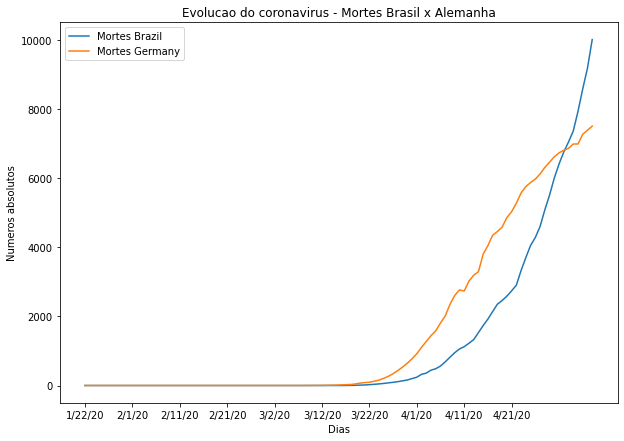

In [109]:
plt.figure(figsize= (10,7))
plt.title('Evolucao do coronavirus - Mortes Brasil x Alemanha')
plt.xlabel('Dias')
plt.xticks(range(0, 100, 10), fontsize=10)  
plt.ylabel('Numeros absolutos')

paises = ['Brazil', 'Germany']

for pais in paises:
    casos_confirmados_grafico, casos_confirmados_total, casos_mortes_grafico, casos_mortes_total, casos_recuperados_grafico, casos_recuperados_total, letalidade_pais_atual, letalidade_pais_grafico = obter_info_pais(pais, df_confirmados, df_mortes, df_recuperados)
    plt.plot(casos_mortes_grafico, label = 'Mortes ' + pais)
    
plt.legend()


In [110]:
casos_confirmados_grafico, casos_confirmados_total, casos_mortes_grafico, casos_mortes_total, casos_recuperados_grafico, casos_recuperados_total, letalidade_pais_atual, letalidade_pais_grafico = obter_info_pais('Paraguay', df_confirmados, df_mortes, df_recuperados)

/home/fabio/miniconda2/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in long_scalars


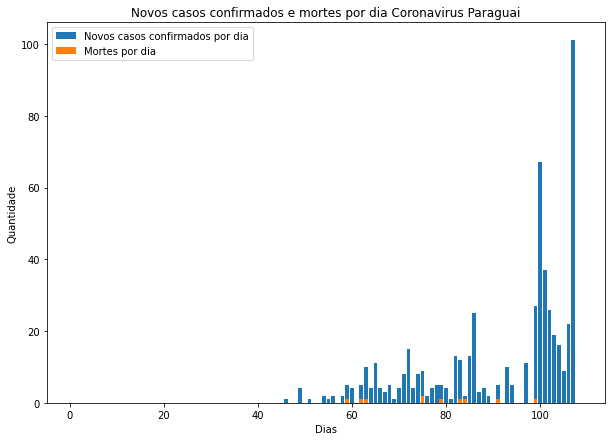

In [111]:
# Dados já recuperados para a Paraguai:
# casos_confirmados_grafico
# casos_confirmados_total
# casos_mortes_grafico
# casos_mortes_total
# casos_recuperados_grafico
# casos_recuperados_total
# letalidade_pais_atual
# letalidade_pais_grafico


plt.figure(figsize= (10,7))


dias = []
casos_diarios = []
mortes_diarios = []
recuperados_diarios = []

i = 0
while i < len(casos_confirmados_grafico):
    i = i + 1
    casos_diarios.append(casos_confirmados_grafico[:i+1][-1] - casos_confirmados_grafico[:i][-1])
    mortes_diarios.append(casos_mortes_grafico[:i+1][-1] - casos_mortes_grafico[:i][-1])
    recuperados_diarios.append(casos_recuperados_grafico[:i+1][-1] - casos_recuperados_grafico[:i][-1])
    dias.append(i)


plt.title('Novos casos confirmados e mortes por dia Coronavirus Paraguai')
plt.xlabel('Dias')
plt.ylabel('Quantidade')

plt.bar(dias,casos_diarios, label = 'Novos casos confirmados por dia')
plt.bar(dias,mortes_diarios, label = 'Mortes por dia')

plt.legend()